# Programación para la Bioinformática

# Unidad 3: Librerías científicas en Python - NumPy - Ejercicios
-------------------------------------------------

## Etiquetas

Bienvenidos a la PEC de la unidad 3. Bajo estas lineas encontrareis Ejercicios y preguntas cada uno de ellos tendrá una etiqueta que indica los recursos necesarios para resolverlos. Hay tres posibles etiquetas:



* **<font color="green" size="+2">MU</font>** **Materiales unidad**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* **<font color="blue" size="+2">EG</font>** **Consulta externa guiada**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de como encontrar la información adicional necesaria.

* **<font color="gold" size="+2">CI</font>** **Consulta externa independiente**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, y el enunciado no incluye las indicaciones de como encontrar la información adicional. El estudiante deberá buscar esta información independientemente.)

## Tests

Antes de nada, decir que en el ámbito de la programación es muy común utilizar tests (llamados tests unitarios) durante la codificación de los programas. Los tests sirven para saber si un programa se comporta como se espera. Es decir, sirven para validar la funcionalidad del programa, no para determinar la calidad del código.

Así pues, los tests son un gran aliado del programador. Es por eso que la mayoría de los ejercicios e incluso alguna de las preguntas tendran una celda bajo ellas con un comentario en la primera línea con el título: `# Test Ejercicio X` o `Test Pregunta X`

**IMPORTANTE**: **no debéis modificar las celdas de test**.

Si las ejecutáis, lo que CoLab hará será ejecutar el test correspondiente sobre vuestro código. Dependiendo del resultado, sabréis que:

* Si el test falla, entonces vuestro código no funciona como se espera. Así pues, tendréis que corregirlo.

* Si el test no falla, entonces vuestro código se comporta como se espera. Sin embargo, esto no significa que el el ejercicio sea correcto, ya que hay situaciones en las que se pide usar una determinada función o estructura. Por ejemplo, imaginad que se pide resolver un ejercicio usando un ``for`` y, en su lugar, usáis un ``while``. Pues seguramente vuestro programa pasaría el test (porque funciona como se espera), pero no respeta un requisito del enunciado.

**Para poder ejecutar los tests primero debéis ejecutar la siguiente celda de código**: (Tan solo una vez por sesión)

In [1]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00


###**Ejercicios de entrenamiento**

### **Ejercicio 1**



Convierte la siguiente lista en una variable llamada **numpy_array** que ue sea un array de numpy.

In [ ]:
import numpy as np

llista = [1,3,4,7,32,4,56,21]

# Respuesta
# Usamos np.array para convertir nuestra lista en un array
numpy_array = np.array(llista)
print(numpy_array) # Imprimimos el resultado

[ 1  3  4  7 32  4 56 21]


### **Ejercicio 2**

El archivo `rmsd.dat` contiene los valores de rmsd (https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions) de un sitema a lo largo de una dinámica molecular. El archivo esta organizado de la siguiente manera:

* **Líneas**: Corresponden a cada paso de la dinámica molecular.
* **Primera columna**: Paso de dinámica
* **Segunda columna**: rmsd del backbone de la proteína
* **Tercera columna**: rmsd del sustrato de la proteína
* **Cuarta columna**: rmsd del centro activo de la proteína (los residuos que interaccionan con el sustrato).

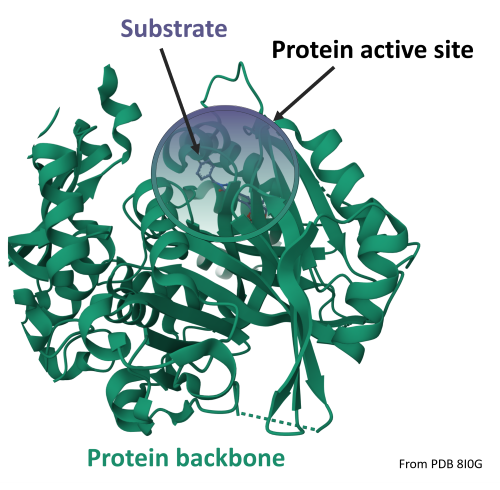

In [ ]:
# Executeu primer aquesta cel·la per a descarregar el fitxer
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/rmsd_uoc.dat --no-check-certificate

File ‘rmsd_uoc.dat’ already there; not retrieving.




El ejercicio consiste al crear dos funciones llamadas **leer_rmsd()** y **rmsd_paso()**, estas funciones tienen que hacer el siguiente.
* **leer_rmsd()**: lee el fichero `rmsd.dat` utilizando la función de `numpy.loadtxt()`
* **rmsd_paso()**: te devuelve los valores de rmsd en un paso concreto de la dinámica.

In [ ]:
import numpy as np

def leer_rmsd(fichero_rmsd):
  # Con np.loadtxt(fichero_rmsd)
  datos_fichero = np.loadtxt(fichero_rmsd)
  return datos_fichero

def rmsd_paso(fichero_rmsd, paso_dinamica=0):
  # Primero cargamos los datos con la funcion ya establecida
  datos_f = leer_rmsd(fichero_rmsd)

  # Seguidamente filtramos para la fila según el paso que busquemos
  fila = datos_f[datos_f[:, 0] == paso_dinamica]

  # Extraemos los valores para las distintas columnas
  rmsd_backbone = fila[0, 1]
  rmsd_sustrato = fila[0, 2]
  rmsd_centroactivo = fila[0, 3]
  return rmsd_backbone, rmsd_sustrato, rmsd_sustrato

# Podemos probar la función para el paso 2
resultado = rmsd_paso('rmsd_uoc.dat', paso_dinamica=2)
print("Resultados para el paso 2:", resultado)

Resultados para el paso 2: (np.float64(1.1409043073654175), np.float64(1.4891244173049927), np.float64(1.4891244173049927))


### **Ejercicio 3**


Cread una función llamada **angulo_atomos()** que calcule el ángulo entre tres átomos y te devuelva el valor del ángulo en radianes (por defecto) o en grados si se le pide como variable de entrada en formato string, del estilo **angulo_atomos(atomoA,atomoB,atomoC, 'grados')**.


>_NOTAS_:

* Para calcular el ángulo entre dos vectores se tiene que usar la siguiente formula (https://upload.wikimedia.org/wikipedia/commons/7/76/Inner-product-angle.svg).
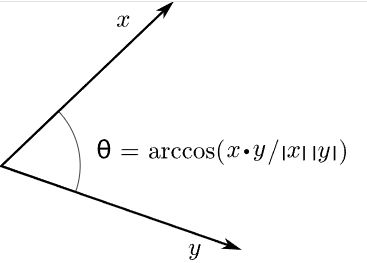
* Usad las siguientes funciones de numpy: **np.linalg.norm, np.array, np.arccos, np.dote, np.degrees**

In [ ]:
import numpy as np


# Coordenadas átomo A
atomo_A = [-0.325,0.945,0]
# Coordenadas átomo B
atomo_B = [0,0,0]
# Coordenadas átomo C
atomo_C = [1,0,0]

def angulo_atomos(atomo_A,atomo_B,atomo_C,grados=False):
  # Convertimos las coordenadas de cada átomo en arrays
  A = np.array(atomo_A)
  B = np.array(atomo_B)
  C = np.array(atomo_C)

  # Calculamos los vectores BA y BC (suponiendo atomo_B como atomo central)
  BA = A - B
  BC = C - B

  # Calculamos el producto matricial entre los vectores BA y BC
  producto = np.dot(BA, BC)

  # Calculamos el módulo entre los vectores
  mod_BA = np.linalg.norm(BA)
  mod_BC = np.linalg.norm(BC)

  # Calculamos el coseno del ángulo
  coseno = producto / (mod_BA * mod_BC)

  # Calculamos el ángulo a partir del cos
  angulo = np.arccos(coseno)

  # Si se pide en grados lo damos en grados
  if grados == 'grados':
    angulo = np.degrees(angulo)

  return angulo

# Calculamos el ángulo en radianes
print(angulo_atomos(atomo_A, atomo_B, atomo_C))

# Calculamos el ángulo en grados
print(angulo_atomos(atomo_A, atomo_B, atomo_C, 'grados'))

1.9020402668721934
108.97887975571345


### **Ejercicio 4**



Creu una función llamada **array_smaller_than()** que devuelva un nuevo en el que solo se converven los valores mas pequeños que un cierto número que se defina como una variable de entrada. Es decir, si tenemos el siguiente array:


```
x = np.array([[1, 2, 3, 5], [-1, 4, 7, 9]])
print(array_smaller_than(x,4))
[1 2 3 -1]
```



In [ ]:
def array_smaller_than(x,threshold):
  # Definimos un nuevo array que imprima solo los valores mas pequeños que el valor de threshold
  nuevo_array = x[x<threshold]
  return nuevo_array

# Ejemplo
x = np.array([[1, 2, 3, 5], [-1, 4, 7, 9]])
array_smaller_than(x, 5)

array([ 1,  2,  3, -1,  4])

###**Ejercicios evaluables**

### Ejercicio 1 **<font color="gold" size="+2">CI</font>**
Cread una matriz de 8x8 que tenga un patrón 0 (blancas)/1 (negras) como si se tratara de un tablero de ajedrez y asignadlo a la variable **tablero**. El resultado ha de ser:

```
[[0 1 0 1 0 1 0 1]
[1 0 1 0 1 0 1 0]
[0 1 0 1 0 1 0 1]
[1 0 1 0 1 0 1 0]
[0 1 0 1 0 1 0 1]
[1 0 1 0 1 0 1 0]
[0 1 0 1 0 1 0 1]
[1 0 1 0 1 0 1 0]]
```

In [15]:
import numpy as np
# Creamos dos tableros uno llamado filas y otro columnas
# tiene dimensiones 8x8 y contienen los indices para filas y columnas
filas, columnas = np.indices((8, 8))

# Sumamos los dos tableros
filas_mas_columnas = filas + columnas #ahora tenemos un solo tablero que alterna un número par e impar

# Tenemos un solo tablero organizado entre par e impar;
# Dividimos el tablero %2 de manera que los números pares daran 0, y los impares 1
tablero = (filas_mas_columnas % 2)
print(tablero)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [16]:
%%ipytest
import pytest
# Test Ejercicio 1
def test_matrix():
  assert tablero.shape == (8,8)
  assert (tablero[0] == np.array([0,1,0,1,0,1,0,1])).all()
  assert (tablero[1] == np.array([1,0,1,0,1,0,1,0])).all()
  assert (tablero[2] == np.array([0,1,0,1,0,1,0,1])).all()
  assert (tablero[3] == np.array([1,0,1,0,1,0,1,0])).all()
  assert (tablero[4] == np.array([0,1,0,1,0,1,0,1])).all()
  assert (tablero[5] == np.array([1,0,1,0,1,0,1,0])).all()
  assert (tablero[6] == np.array([0,1,0,1,0,1,0,1])).all()
  assert (tablero[7] == np.array([1,0,1,0,1,0,1,0])).all()

.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 2 **<font color="blue" size="+2">EG</font>**
Dadas dos matrices m1 y m2 de tamaño 4x4, Obtened la matriz resultado de sumar la primera a la segunda y asignadla a la variable **suma**. Obtened también la matriz resultante de la resta de la transpuesta de la segunda a la transpuesta de la primera y asociadla a la variable **restaT**.

En caso de que lo necesitéis, aquí podáis encontrar más imformación sobre la transposición de matrices https://totumat.com/2020/06/19/transposicion-de-matrices/ y aqui la documentación oficial de numpy https://numpy.org/doc/stable/numpy-user.pdf


In [ ]:
 # resultado

#suma
"""
[[ 8  5 14  8]
 [ 9 12  3  8]
 [12  2 12  9]
 [16  6 10 11]]
"""
#restaT
"""
[[ 0 -1  0  0]
 [-1  4  2 -6]
 [-2 -3 -6  0]
 [ 6  4 -9 -1]]
"""

'\n[[ 0 -1  0  0]\n[-1  4  2 -6]\n[-2 -3 -6  0]\n[ 6  4 -9 -1]]\n'

In [17]:
import numpy as np

# Matrix 1 de 4x4
m1 = np.array([[4,2,6,7],
               [4,8,0,6],
               [6,2,3,0],
               [8,0,5,5]])
print(m1)

# Matrix 2 de 4x4
m2 = np.array([[4,3,8,1],
               [5,4,3,2],
               [6,0,9,9],
               [8,6,5,6]])
print(m2)

# Creamos una varaible suma que es la suma de las matrices m1 y m2
suma = m1 + m2
print(suma)

# La matriz transpuesta es el resultado de cambiar filasxcolumnas (y viceversa)
# Creamos una varaible restaT que es la resta de las transpuestas (m1-transpuesta - m2-transpuesta);
# creamos las transpuestas con .T
restaT = m1.T - m2.T
print(restaT)

[[4 2 6 7]
 [4 8 0 6]
 [6 2 3 0]
 [8 0 5 5]]
[[4 3 8 1]
 [5 4 3 2]
 [6 0 9 9]
 [8 6 5 6]]
[[ 8  5 14  8]
 [ 9 12  3  8]
 [12  2 12  9]
 [16  6 10 11]]
[[ 0 -1  0  0]
 [-1  4  2 -6]
 [-2 -3 -6  0]
 [ 6  4 -9 -1]]


In [18]:
%%ipytest
import pytest
# Test ex 2
def test_matrix_operations():
  assert suma.shape == (4,4)
  assert restaT.shape == (4,4)
  assert (suma[0] == np.array([8,5,14,8])).all()
  assert (suma[1] == np.array([9,12,3,8])).all()
  assert (suma[2] == np.array([12,2,12,9])).all()
  assert (suma[3] == np.array([16,6,10,11])).all()
  assert (restaT[0] == np.array([0,-1,0,0])).all()
  assert (restaT[1] == np.array([-1,4,2,-6])).all()
  assert (restaT[2] == np.array([-2,-3,-6,0])).all()
  assert (restaT[3] == np.array([6,4,-9,-1])).all()

.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 3 **<font color="green" size="+2">MU</font>**
Cread dos matrices de tamaño 8x6 y 6x6, **m1** y **m2**, obtened la matriz resultado de multiplicar la primera por la segunda y asignadla a la variable **mult**:

In [19]:
# Matriu de 8x6
m1 = np.array([[64,22,2,7,25,64],
               [54,48,86,56,14,52],
               [46,91,89,95,22,36],
               [38,81,65,15,17,48],
               [23,42,11,71,4,1],
               [61,34,11,56,73,13],
               [72,14,73,15,84,43],
               [64,19,29,49,4,71]])

# Matriu 2 de 6x6
m2 = np.array([[54,63,88,11,54,26],
               [85,4,33,22,14,13],
               [86,87,79,39,69,96],
               [48,56,11,26,17,18],
               [2,7,73,5,84,43],
               [24,59,29,49,4,71]])

# Al multiplicar las dos matrices (8x6) * (6x6) como son de distintas dimensiones,
# la matriz resultante será entra las filas de m1 y las columnas de m2 (8x6)
mult = np.dot(m1, m2)
print(mult)

[[ 7420  8637 10274  4709  6377  7887]
 [18356 17378 16276  9078 11858 15586]
 [23341 18603 17777 10323 13506 16135]
 [16433 12164 13950  7562  9546 12690]
 [ 9198  6637  5381  3521  4136  3721]
 [10276  9350 13681  4306 11665  8154]
 [13276 14908 20109  6864 16604 15997]
 [11629 13592 11440  7026  7176 10790]]


In [20]:
%%ipytest
import pytest
# Test ex 3
def test_matrix_operations():
  assert mult.shape == (8,6)
  assert (mult[0] == ([7420,8637,10274,4709,6377,7887])).all()
  assert (mult[1] == ([18356,17378,16276,9078,11858,15586])).all()
  assert (mult[2] == ([23341,18603,17777,10323,13506,16135])).all()
  assert (mult[3] == ([16433,12164,13950,7562,9546,12690])).all()
  assert (mult[4] == ([9198,6637,5381,3521,4136,3721])).all()
  assert (mult[5] == ([10276,9350,13681,4306,11665,8154])).all()
  assert (mult[6] == ([13276,14908,20109,6864,16604,15997])).all()
  assert (mult[7] == ([11629,13592,11440,7026,7176,10790])).all()


.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 4 **<font color="green" size="+2">MU</font>**
Calculad la media y la desviación estándar del vector **v**. Asignad los resultados a las variables **mean** y **stdev**. Redondead los resultados a dos decimales usando `round()`.

El vector **v** es un vector generado al azar de 40 números entre 0 y 200.


In [21]:
import numpy as np

np.random.seed(1)
v = np.random.randint(0, 200, 40)
# indicando una random seed constante con np.random.seed (1 en este caso)
# antes de invocar la función para generar números al azar, nos aseguramos
# que el vector de random numbers sea el mismo siempre (reproducibilidad)
print("El vector de numeros aleatorios es:")
print(v)
# Respuesta:
# Calculamos la media con np.mean y redondeamos con round
mean = round(np.mean(v), 2)
print(f"La media es {mean}")
# Calculamos la desviación estandar con np.std
stdev = round(np.std(v), 2)
print(f"La desviación estandar es {stdev}")

El vector de numeros aleatorios es:
[ 37 140  72 137 133  79 192 144 129  71 134  25 178  20 101 146 139 156
 157 142  50  68  96  86 141 137   7  63  61  22  57   1 128  60   8 141
 115 175 121  30]
La media es 97.48
La desviación estandar es 52.89


In [22]:
%%ipytest
import pytest
# Test Exercici 4
def test_matrix_operations():
  assert mean == 97.48
  assert stdev == 52.89

.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 5 **<font color="green" size="+2">MU</font>**
Evaluad las funciones coseno y arcoseno en el intervalo [-1,1] y con paso (resolución) de 0.05 y guardadlas en dos arrays (evaluar significa calcular) llamados **arr1** (coseno) y **arr2** (arcoseno):

In [ ]:
# El resultado:
# arr1 (cosieno)
"""
[0.54030231 0.58168309 0.62160997 0.65998315 0.69670671 0.73168887
 0.76484219 0.7960838  0.82533561 0.85252452 0.87758256 0.9004471
 0.92106099 0.93937271 0.95533649 0.96891242 0.98006658 0.98877108
 0.99500417 0.99875026 1.         0.99875026 0.99500417 0.98877108
 0.98006658 0.96891242 0.95533649 0.93937271 0.92106099 0.9004471
 0.87758256 0.85252452 0.82533561 0.7960838  0.76484219 0.73168887
 0.69670671 0.65998315 0.62160997 0.58168309]
"""
# o bien

"""

0.54030231 0.58168309 0.62160997 0.65998315 0.69670671 0.73168887
 0.76484219 0.7960838  0.82533561 0.85252452 0.87758256 0.9004471
 0.92106099 0.93937271 0.95533649 0.96891242 0.98006658 0.98877108
 0.99500417 0.99875026 1.         0.99875026 0.99500417 0.98877108
 0.98006658 0.96891242 0.95533649 0.93937271 0.92106099 0.9004471
 0.87758256 0.85252452 0.82533561 0.7960838  0.76484219 0.73168887
 0.69670671 0.65998315 0.62160997 0.58168309 0.54030231
 """
 # arr2 (arcoseno)
"""
[-1.57079633e+00 -1.25323590e+00 -1.11976951e+00 -1.01598529e+00
 -9.27295218e-01 -8.48062079e-01 -7.75397497e-01 -7.07584437e-01
 -6.43501109e-01 -5.82364238e-01 -5.23598776e-01 -4.66765339e-01
 -4.11516846e-01 -3.57571104e-01 -3.04692654e-01 -2.52680255e-01
 -2.01357921e-01 -1.50568273e-01 -1.00167421e-01 -5.00208568e-02
  8.88178420e-16  5.00208568e-02  1.00167421e-01  1.50568273e-01
  2.01357921e-01  2.52680255e-01  3.04692654e-01  3.57571104e-01
  4.11516846e-01  4.66765339e-01  5.23598776e-01  5.82364238e-01
  6.43501109e-01  7.07584437e-01  7.75397497e-01  8.48062079e-01
  9.27295218e-01  1.01598529e+00  1.11976951e+00  1.25323590e+00]
"""

# o bien

"""
-1.57079633e+00 -1.25323590e+00 -1.11976951e+00 -1.01598529e+00
 -9.27295218e-01 -8.48062079e-01 -7.75397497e-01 -7.07584437e-01
 -6.43501109e-01 -5.82364238e-01 -5.23598776e-01 -4.66765339e-01
 -4.11516846e-01 -3.57571104e-01 -3.04692654e-01 -2.52680255e-01
 -2.01357921e-01 -1.50568273e-01 -1.00167421e-01 -5.00208568e-02
  8.88178420e-16  5.00208568e-02  1.00167421e-01  1.50568273e-01
  2.01357921e-01  2.52680255e-01  3.04692654e-01  3.57571104e-01
  4.11516846e-01  4.66765339e-01  5.23598776e-01  5.82364238e-01
  6.43501109e-01  7.07584437e-01  7.75397497e-01  8.48062079e-01
  9.27295218e-01  1.01598529e+00  1.11976951e+00  1.25323590e+00
  1.57079633e+00
  """

In [23]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Respuesta
# Creamos un vector de -1 a 1 con paso 0.05, (np.arange)
mi_intervalo = np.arange(-1, 1, 0.05)

# En las variables arr1 y arr2 calculamos el coseno (np.cos) y el arcocoseno (np.arcsin) respectivamente;ç
# para mi_intervalo
arr1 = np.cos(mi_intervalo)
arr2 = np.arcsin(mi_intervalo)
print(arr1)
print(arr2)

[0.54030231 0.58168309 0.62160997 0.65998315 0.69670671 0.73168887
 0.76484219 0.7960838  0.82533561 0.85252452 0.87758256 0.9004471
 0.92106099 0.93937271 0.95533649 0.96891242 0.98006658 0.98877108
 0.99500417 0.99875026 1.         0.99875026 0.99500417 0.98877108
 0.98006658 0.96891242 0.95533649 0.93937271 0.92106099 0.9004471
 0.87758256 0.85252452 0.82533561 0.7960838  0.76484219 0.73168887
 0.69670671 0.65998315 0.62160997 0.58168309]
[-1.57079633e+00 -1.25323590e+00 -1.11976951e+00 -1.01598529e+00
 -9.27295218e-01 -8.48062079e-01 -7.75397497e-01 -7.07584437e-01
 -6.43501109e-01 -5.82364238e-01 -5.23598776e-01 -4.66765339e-01
 -4.11516846e-01 -3.57571104e-01 -3.04692654e-01 -2.52680255e-01
 -2.01357921e-01 -1.50568273e-01 -1.00167421e-01 -5.00208568e-02
  8.88178420e-16  5.00208568e-02  1.00167421e-01  1.50568273e-01
  2.01357921e-01  2.52680255e-01  3.04692654e-01  3.57571104e-01
  4.11516846e-01  4.66765339e-01  5.23598776e-01  5.82364238e-01
  6.43501109e-01  7.07584437e-01  

In [24]:
%%ipytest
import pytest
# Test Exercici 5
def test_range():
  assert round(arr1[0],2) == 0.54
  assert round(arr1[-1],2) == 0.58 or round(arr1[-1],2) == 0.54
  assert round(arr2[0],2) == -1.57
  assert round(arr2[-1],2) == 1.25 or round(arr2[-1],2) == 1.57

.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 6 **<font color="green" size="+2">MU</font>**
En química computacional, es muy útil simular mediante la técnica de dinámica molecular cómo pequeños ligandos (por ejemplo, la aspirina) se unen a otras proteínas. Esta unión entre una proteína y un ligando puede bloquear la unión de esa misma proteína junto a otras, potenciarla, etc.
En nuestro caso, hemos obtenido dos capturas del movimiento de la molécula de aspirina y deseamos saber cuál es la distancia en términos de RMSD entre ambas, es decir, cuánto se ha movido entre una captura y la otra. Si representáramos ese movimiento, podríamos visualizar algo similar a esto:

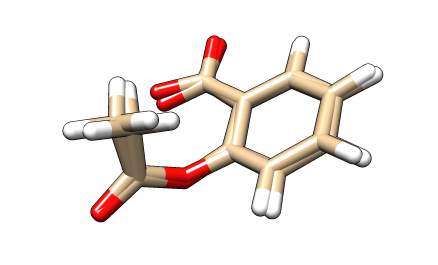

A continuación, tenéis parte del código que deberéis completar para calcular la distancia RMSD que está definida de la siguiente forma: https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions.

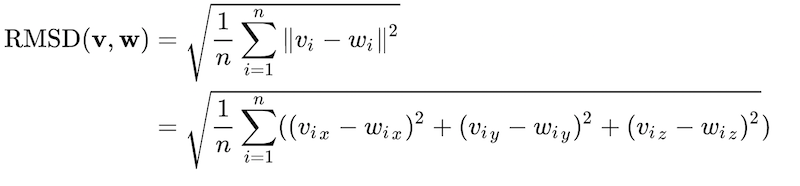

Las siguientes funciones implementan el calculo del valor RMSD a partir de dos estructuras, contenidas en las variables `estructura_1` i `estructura_2`. La función `calcula_rmsd_numpy` esta incompleta. Completen-la para obtener el valor RMSD.

In [25]:
import numpy as np
import os


# Estructura atómica en formato PDB
estructura_1 = """
HETATM    1  C4  AIN A 141      20.988  20.013   8.918  1.00 32.08           C
HETATM    2  C3  AIN A 141      19.732  19.385   8.857  1.00 32.34           C
HETATM    3  C2  AIN A 141      19.527  18.104   9.636  1.00 33.22           C
HETATM    4  C5  AIN A 141      21.977  19.496   9.752  1.00 31.39           C
HETATM    5  H4  AIN A 141      21.183  20.890   8.320  1.00  0.00           H
HETATM    6  C6  AIN A 141      21.761  18.347  10.492  1.00 31.52           C
HETATM    7  H5  AIN A 141      22.932  19.991   9.830  1.00  0.00           H
HETATM    8  C1  AIN A 141      20.570  17.658  10.434  1.00 32.96           C
HETATM    9  H6  AIN A 141      22.537  17.967  11.139  1.00  0.00           H
HETATM   10  H1  AIN A 141      20.440  16.756  11.015  1.00  0.00           H
HETATM   11  C7  AIN A 141      18.679  19.893   7.921  1.00 32.12           C
HETATM   12  O1  AIN A 141      18.856  21.012   7.231  1.00 28.52           O
HETATM   13  O2  AIN A 141      17.582  19.373   7.818  1.00 32.90           O
HETATM   14  O3  AIN A 141      18.290  17.505   9.519  1.00 35.01           O
HETATM   15  C8  AIN A 141      17.117  17.595  10.410  1.00 35.75           C
HETATM   16  O4  AIN A 141      16.308  16.678  10.381  1.00 37.46           O
HETATM   17  C9  AIN A 141      16.879  18.753  11.344  1.00 36.44           C
HETATM   18  H91 AIN A 141      15.952  18.591  11.895  1.00  0.00           H
HETATM   19  H92 AIN A 141      17.709  18.830  12.046  1.00  0.00           H
HETATM   20  H93 AIN A 141      16.803  19.676  10.769  1.00  0.00           H
"""

estructura_2 = """
HETATM    1  C4  AIN A 141      20.909  19.934   8.896  1.00 32.08           C
HETATM    2  C3  AIN A 141      19.652  19.312   8.766  1.00 32.34           C
HETATM    3  C2  AIN A 141      19.387  18.158   9.565  1.00 33.22           C
HETATM    4  C5  AIN A 141      21.860  19.487   9.821  1.00 31.39           C
HETATM    5  H4  AIN A 141      21.131  20.820   8.331  1.00  0.00           H
HETATM    6  C6  AIN A 141      21.586  18.379  10.634  1.00 31.52           C
HETATM    7  H5  AIN A 141      22.771  20.048   9.926  1.00  0.00           H
HETATM    8  C1  AIN A 141      20.364  17.703  10.480  1.00 32.96           C
HETATM    9  H6  AIN A 141      22.314  18.043  11.358  1.00  0.00           H
HETATM   10  H1  AIN A 141      20.171  16.825  11.079  1.00  0.00           H
HETATM   11  C7  AIN A 141      18.638  19.970   7.867  1.00 32.12           C
HETATM   12  O1  AIN A 141      18.979  20.954   7.165  1.00 28.52           O
HETATM   13  O2  AIN A 141      17.431  19.667   7.937  1.00 32.90           O
HETATM   14  O3  AIN A 141      18.249  17.398   9.458  1.00 35.01           O
HETATM   15  C8  AIN A 141      17.235  17.488  10.335  1.00 35.75           C
HETATM   16  O4  AIN A 141      16.343  16.644  10.397  1.00 37.46           O
HETATM   17  C9  AIN A 141      17.211  18.698  11.261  1.00 36.44           C
HETATM   18  H91 AIN A 141      16.416  18.581  11.994  1.00  0.00           H
HETATM   19  H92 AIN A 141      17.154  18.814  11.795  1.00  0.00           H
HETATM   20  H93 AIN A 141      17.020  19.587  11.663  1.00  0.00           H
"""

def lee_coordenadas_atomo(linea):
    """Obtiene de una línea de texto en formato PDB las coordenadas en f
    ormato numérico"""
    if linea.startswith('HETATM'):
        x = float(linea[30:38])    # Coordenada x
        y = float(linea[38:46])    # Coordenada y
        z = float(linea[46:54])    # Coordenada z
        return [x, y, z]


def obtiene_coordenadas(estructura):
    """Transforma las coordenadas de cada átomo en un array numpy"""
    coordenadas = []
    for linea in estructura.split(os.linesep):
        atomo = lee_coordenadas_atomo(linea)
        if atomo:
            coordenadas.append(atomo)
    return np.array(coordenadas)


def calcula_rmsd_numpy(coordenadas_1, coordenadas_2):
    """Calcula la RMSD entre dos conjuntos de coordenadas atómicas"""
    # Aquí es dónde tenéis que completar el código. La solución puede ser
    # una sola línea gracias a la capacidad de NumPy de hacer cálculos con
    # matrices mediante "broadcast".
    # Si no dais con una solución en una línea no hay problema :)
    # Calculamos haciendo la raiz (np.sqrt) de la media (np.mean) del sumatorio (np.sum);
    # de la diferencia de coordenadas al cuadrado; axis=1 para sumar por filas
    return np.sqrt(np.mean(np.sum((coordenadas_1-coordenadas_2)**2, axis=1)))


coordenadas_1 = obtiene_coordenadas(estructura_1)
coordenadas_2 = obtiene_coordenadas(estructura_2)

rmsd = calcula_rmsd_numpy(coordenadas_1, coordenadas_2)

print(rmsd)



0.3306335584903623


El resultado del cálculo de la RMSD ha de ser de 0.3306335584903623, no puede ser un número entero.

In [26]:
%%ipytest
import pytest
# Test Ejercicio 6
def test_rmsd():
  assert round(rmsd, 4) == 0.3306

.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 7 **<font color="gold" size="+2">CI</font>**

Dado un vector de números enteros de 50 posiciones, ordénalo de mayor a menor y guardalo en la variable **v_ord**.

In [27]:
import numpy as np

v = [32,34,16,12,15,12,16,4,36,48,8,49,44,17,45,1,4,39,7,25,49,2,28,46,26,30,33,0,1,1,7,46,33,4,48,26,44,39,47,21,10,8,9,0,4,47,4,5,31,36]

# Respuesta
# Ordenamos primero de menor a mayor con np.sort;
# seguidamente invertimos de menor->mayor a mayor->menor con [::-1]
v_ord = np.sort(v)[::-1]
print(v_ord)

[49 49 48 48 47 47 46 46 45 44 44 39 39 36 36 34 33 33 32 31 30 28 26 26
 25 21 17 16 16 15 12 12 10  9  8  8  7  7  5  4  4  4  4  4  2  1  1  1
  0  0]


In [28]:
%%ipytest
import pytest
# Test Ejercicio 7
def test_vector_order():
  assert (v_ord==np.array([49,49,48,48,47,47,46,46,45,44,44,39,39,36,36,34,33,33,32,31,30,28,26,26,25,21,17,16,16,15,12,12,10,9,8,8,7,7,5,4,4,4,4,4,2,1,1,1,0,0])).all()

.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 8 **<font color="gold" size="+2">CI</font>**

Dado un vector `Z` con números entre 0 y 1 de 150 posiciones y un valor `v = 0.142`, encuentra cuál es el valor en `Z` más próximo a `v`. Utilizaremos **index** para almacenar la posición del **valor más cercano** a `v` dentro del vector. Utilizaremos most_near para almacenar el valor más cercano a `v` dentro de `Z`:

In [29]:
import numpy as np

Z = np.array([0.47370212,0.25529126,0.14185629,0.43800344,0.14191255,0.13811606
,0.56393031,0.79486108,0.94497137,0.34532689,0.62077661,0.75569338
,0.03507992,0.03631658,0.83053741,0.17063296,0.48774614,0.24728938
,0.68578153,0.14989139,0.70160575,0.09869355,0.67518005,0.32001098
,0.38766074,0.2506084,0.27578849,0.21020638,0.41856259,0.42924341
,0.5796057,0.83684612,0.15287736,0.80840809,0.18059722,0.29401945
,0.96431538,0.93911687,0.19348456,0.92773145,0.46576311,0.56594311
,0.14563132,0.96743836,0.57645228,0.45963292,0.53020008,0.58017907
,0.29103792,0.85761428,0.95347215,0.53074319,0.32046363,0.19017377
,0.02301601,0.18212538,0.95707445,0.29935785,0.94445146,0.7539973
,0.18848989,0.61350444,0.25629779,0.6766848,0.80484832,0.09313032
,0.08696591,0.78636759,0.12149494,0.29984922,0.50907144,0.97339267
,0.89741195,0.86070382,0.15531135,0.46630207,0.24410653,0.43749686
,0.01183518,0.1880066,0.27382705,0.48016088,0.02520031,0.6276133
,0.49091366,0.74715877,0.24073464,0.21716126,0.39434092,0.70963362
,0.62675567,0.94783246,0.68550872,0.92280793,0.19841676,0.40269405
,0.55709966,0.60503329,0.996637,0.93841545,0.4777027,0.20834217
,0.51677753,0.77569501,0.2332341,0.66266603,0.57195572,0.03198887
,0.39326806,0.92096347,0.50169497,0.98660812,0.41662483,0.92246436
,0.94140233,0.67723669,0.28669915,0.95055493,0.61936936,0.41586238
,0.40016493,0.66382301,0.8938141,0.87043412,0.71962224,0.8319666
,0.66392606,0.9325445,0.9268264,0.28108971,0.26990245,0.68880014
,0.78647523,0.51829763,0.1464974,0.72288329,0.40595263,0.04795195
,0.80524287,0.25883494,0.04962221,0.34467542,0.5671253,0.29390834
,0.0035815,0.76282016,0.51954218,0.47862693,0.958991,0.67178204])

v = 0.142

#Respuesta
# Restamos los valores de Z con los de v, y sacamos los valores absolutos de la resta (np.abs)
# de este modo el número mas cercano a cero compartir el índice con el mas cercano al valor de v
diferencias = np.abs(Z - v)

# Buscamos el índice del valor mas cercano a 0 (np.argmin)
index = np.argmin(diferencias)

# Ya tenemos el índice del valor mas cercano a v lo imprimimos para nuestro vector Z
most_near = Z[index]
print(most_near)

0.14191255


In [30]:
%%ipytest
import pytest
# Test Exercici 8
def test_most_near():
  assert index==4
  assert round(most_near,5)==0.14191

.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 9 **<font color="gold" size="+2">CI</font>**

En un vector de 150 posiciones, encuentra cuál es el valor que se repite de forma más frecuente y almacena ese valor en la variable **most_frequent**:

In [31]:
import numpy as np

Z = np.array([9,8,3,6,7,6,8,3,8,0,4,6,6,5,7,2,9,5,5,1,0,2,5,5,6,4,7,8,8,0,2,2,2,8,1,1,9
,5,2,2,1,4,5,9,0,0,9,3,2,0,1,9,4,5,8,2,5,3,3,8,8,2,0,2,8,0,4,2,2,7,3,5,1,8
,9,9,1,9,0,1,6,9,7,2,5,3,6,7,8,2,8,3,9,3,0,4,0,1,2,4,6,8,5,9,9,6,9,0,9,6,0
,9,4,6,4,0,4,7,8,3,9,3,8,1,4,3,6,1,8,6,4,4,7,8,5,5,8,4,0,1,0,5,7,6,4])

print(Z)

# respuesta
# Con np.bincount sacamos el listado con los número que mas se repiten
# Con np.argmax buscamos el valor del número que mas se repite en nuestro np.bincount
most_frequent = np.argmax(np.bincount(Z))
print(most_frequent)

[9 8 3 6 7 6 8 3 8 0 4 6 6 5 7 2 9 5 5 1 0 2 5 5 6 4 7 8 8 0 2 2 2 8 1 1 9
 5 2 2 1 4 5 9 0 0 9 3 2 0 1 9 4 5 8 2 5 3 3 8 8 2 0 2 8 0 4 2 2 7 3 5 1 8
 9 9 1 9 0 1 6 9 7 2 5 3 6 7 8 2 8 3 9 3 0 4 0 1 2 4 6 8 5 9 9 6 9 0 9 6 0
 9 4 6 4 0 4 7 8 3 9 3 8 1 4 3 6 1 8 6 4 4 7 8 5 5 8 4 0 1 0 5 7 6 4]
8


In [32]:
%%ipytest
import pytest
# Test Exercici 9
def test_most_frequent():
  assert most_frequent==8

.                                                                                            [100%]
1 passed in 0.01s


###Ejercicio 10 **<font color="green" size="+2">MU</font>**
En un vector de 20 posiciones, devuelve por pantalla la posición (índice) de los números que sean pares dentro del vector y a su vez almacenalos dentro de la variable **pares_index**. Imprime también por pantalla los numeros pares que haya en el vector e igualmente guardalos en la variable **pares**.

In [34]:
import numpy as np

# volvemos a crear el vector de manera determinística con random integers y una seed concreta
np.random.seed(1)
Z = np.random.randint(0, 100, 20)

print("El vector es:")
print(Z)
print()

# respuesta:
# Sacamos los índices de los valores pares con np.where
# cumpliendo la condiciones de pares (Z % 2 == 0)
pares_index = np.where(Z % 2 == 0)
print(pares_index)

# Sacamos los valores de los índices
pares = Z[pares_index]
print(pares)

El vector es:
[37 12 72  9 75  5 79 64 16  1 76 71  6 25 50 20 18 84 11 28]

(array([ 1,  2,  7,  8, 10, 12, 14, 15, 16, 17, 19]),)
[12 72 64 16 76  6 50 20 18 84 28]


In [ ]:
%%ipytest
import pytest
# Test Exercici 10
def test_parells():
  assert (pares_index==np.array([ 1,  2,  7,  8, 10, 12, 14, 15, 16, 17, 19])).all()
  assert (pares==np.array([12,72,64,16,76,6,50,20,18,84,28])).all()

.                                                                                            [100%]
1 passed in 0.01s
